<a href="https://colab.research.google.com/github/sujith525/software-engineering-labb/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error fetching data: Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.
No data available for prediction.


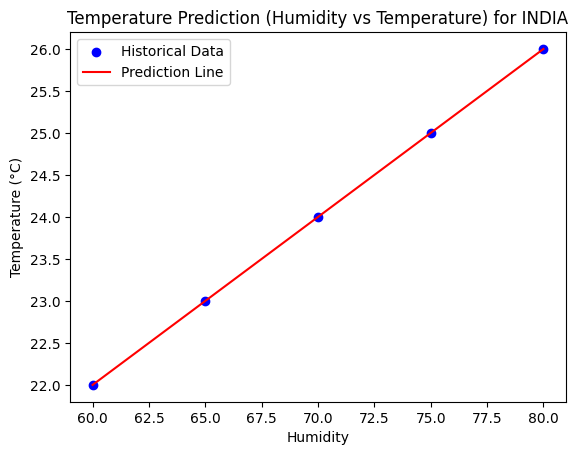

In [ ]:
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


API_KEY = 'your_api_key'
CITY = 'INDIA'


url = f'http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric'

response = requests.get(url)
data = response.json()


if response.status_code == 200:
    main_data = data['main']
    weather_data = {
        'temperature': main_data['temp'],
        'humidity': main_data['humidity'],
        'pressure': main_data['pressure'],
        'city': CITY
    }
    print(f"Weather data for {CITY}: {weather_data}")
else:

    print('Error fetching data:', data.get('message'))
    weather_data = None


historical_data = {
    'humidity': [60, 65, 70, 75, 80],
    'pressure': [1012, 1013, 1014, 1015, 1016],
    'temperature': [22, 23, 24, 25, 26]
}


df = pd.DataFrame(historical_data)


X = df[['humidity', 'pressure']]
y = df['temperature']


model = LinearRegression()
model.fit(X, y)


if weather_data:
    current_data = [[weather_data['humidity'], weather_data['pressure']]]
    predicted_temperature = model.predict(current_data)
    print(f"Predicted temperature for {CITY} is: {predicted_temperature[0]:.2f}°C")
else:
    print("No data available for prediction.")


plt.scatter(df['humidity'], df['temperature'], color='blue', label='Historical Data')
plt.plot(df['humidity'], model.predict(X), color='red', label='Prediction Line')
plt.xlabel('Humidity')
plt.ylabel('Temperature (°C)')
plt.title(f'Temperature Prediction (Humidity vs Temperature) for {CITY}')
plt.legend()
plt.show()


